In [13]:
#Prawdopodobienstwo

#zaleznosc - zdarzenia sa zalezne jesli wiedza o zdarzeniu A pozwala nam przewidziec wystapienie zdarzenia B i na odwrot

#niezalenosc - zdarzenia sa niezalezne jestli prawdopodobienstwo wystapienia tych dwoch zdarzen jest 
#iloczzynem prawdopodbienstwa wystapienia kazdego z nich

#P(E∩F) = P(E)P(F)

#prawdopodobienstwo warunkowe

#prawdopodobienstwo zdarzenia E uwarunkowego zdarzeniem F mozna zapisac za pomoca wzoru
# P(E|F) = P(E∩F)/P(F)

#czesto jest to zapisywane za pomoca wzoru P(E∩F) = P(E|F)P(F)

#Jesli zdarzenia sa niezalezne wzor ten bedzie mial postac P(E|F) = P(E)

In [14]:
import enum, random
#enum jest zbiorem wartosci typu enumerated, mozemy uzyc ich, aby nasz kod byl bardziej czytelny

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
        
print("P(obydwoje | starsze): ", both_girls / older_girl, both_girls, older_girl)
print("P(obydwoje | ktorekolwiek): ",both_girls / either_girl, both_girls, either_girl)

P(obydwoje | starsze):  0.5007089325501317 2472 4937
P(obydwoje | ktorekolwiek):  0.3311897106109325 2472 7464


In [15]:
#funkcja gęstości rozkładu jednostajnego

def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

In [16]:
#dystrybuanta rozkladu

def uniform_cdf(x: float) -> float:
    """Zwraca prawdopodobienstwo tego, ze zmienna rozkladu jednostajnego jest <= x"""
    if x < 0:   return 0 #rozklad jednostajny nigdy nie przyjmuje wartosci mniejszych od 0
    elif x < 1: return x #np. P(X <= 0.4) = 0.4
    else:       return 1 #Liczba wylosowana z rozkladu jednostajnego jest zawsze mniejsza od 1

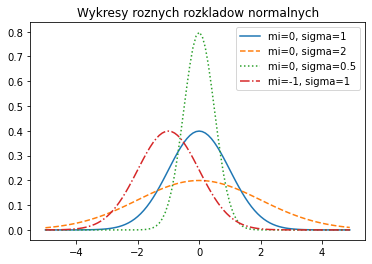

In [17]:
#rozklad norrmalny

import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mi: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mi) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

#przedstawienie wykresow funkcji gestosci rozkladu normalnego

import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma = 1) for x in xs],'-',label='mi=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma = 2) for x in xs],'--',label='mi=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma = 0.5) for x in xs],':',label='mi=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mi = -1) for x in xs],'-.',label='mi=-1, sigma=1')
plt.legend()
plt.title("Wykresy roznych rozkladow normalnych")
plt.show()

In [18]:
#parametr mi = 0 i parametrry sigma = 1 to mamy do czynienia ze standardowym rozkladem normalnym

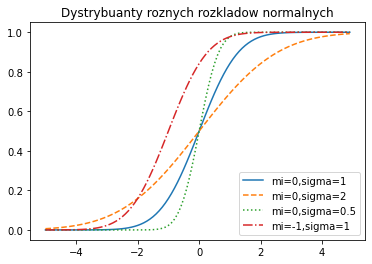

In [19]:
#dystrybuanta rozkladu normalnego

def normal_cdf(x: float, mi: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mi) / math.sqrt(2) / sigma)) / 2

#przedstawienie wykresow dystrybuanty rozkladu normalnego

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs],'-',label='mi=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs],'--',label='mi=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs],':',label='mi=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mi=-1) for x in xs],'-.',label='mi=-1,sigma=1')
plt.legend(loc=4)
plt.title("Dystrybuanty roznych rozkladow normalnych")
plt.show()

In [20]:
#odwrotnosc dystrybuanty rozkladu normalnego

#czasami bedziemy potrzebowac odwrotnosci dystrybuanty rozkladu normalnego. Odwrotnosc ta przydaje sie podczas okreslania
#wartosci odpowiadajacych okreslonemu prawdopodobienstwu

def inverse_normal_cdf(p: float,
                      mi: float = 0,
                      sigma: float = 1,
                      tolerance: float = 0.00001) -> float:
    """znajduje przyblizona wartosc odwrotnosci przy uzyciu algorytmu binary search"""
    
    #jezeli rozklad nie jest standardowy, to oblicz jego standardowa postac i przeskaluj
    if mi != 0 or sigma != 1:
        return mi + sigma * inverse_normal_cdf(p, tolerance = tolerance)
    
    low_z = -10.0
    hi_z = 10
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            #punkt srodkowy znajduje sie za nisko, szukaj nad nim
            low_z = mid_z
        else: 
            #punkt srodkowy znajduje sie za wysoko, szukaj pod nim
            hi_z = mid_z
            
    return mid_z

In [21]:
#centralne twierdzenie graniczne

def bernoulli_trial(p: float) -> int:
    """Zwraca 1 z prawdopodobienstwem p i 0 z prawdopodobienstwem 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p:float) -> int:
    """zwraca sume n prob Bernoulliego(p)"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [22]:
from collections import Counter
def make_hist(p: float, n:int, num_points: int) -> None:
    """rysuje histogram punktow z dwumianu(n,p)"""
    data = [binomial(n, p) for _ in range(num_points)]
    
    #probki dwumianu przedstaw na wykresie slupkowym
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    
    mi = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    #przyblizenie rozkladu normalnego przedstaw na wykresie liniowym
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mi, sigma) - normal_cdf(i - 0.5, mi, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Rozklad dwumianu a przyblizenie rozkladu normalnego")
    plt.show()

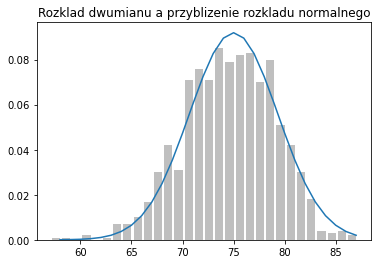

In [25]:
#stworzenie wykresu
make_hist(0.75, 100, 1000)